In [24]:
import pandas as pd

In [25]:
import numpy as np 

In [26]:
train=pd.read_csv('ny.csv')

In [27]:
train.head(3)

,url,pub_date,title,section,author,article
0,https://www.nytimes.com/2011/05/30/business/ec...,2011-05-30T00:00:00Z,Some Faint Praise for Mr. Ballmer,Business Day,RICHARD BEALES and ROBERT CYRAN,Microsoft has missed too many opportunities un...
1,https://www.nytimes.com/2011/07/04/business/me...,2011-07-04T00:00:00Z,Speed Bumps on the Road to Virtual Cash,Business Day,NOAM COHEN,"MONEY is accumulated, traded and transferred o..."
2,https://krugman.blogs.nytimes.com/2011/09/07/g...,2011-09-07T00:20:26Z,Golden Cyberfetters,Opinion,PAUL KRUGMAN,Over the past few months a number of people ha...


In [28]:
train.columns

Index(['url', 'pub_date', 'title', 'section', 'author', 'article'], dtype='object')

In [29]:
train=train[['article']]

In [30]:
train.head(3)

,article
0,Microsoft has missed too many opportunities un...
1,"MONEY is accumulated, traded and transferred o..."
2,Over the past few months a number of people ha...


In [31]:
# Number of words in the text ##
train["num_words"] = train["article"].apply(lambda x: len(str(x).split()))

In [32]:
##average og lenght  of  words
train["mean_word_len"] = train["article"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/home/thebastard/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [33]:
train["num_unique_words"] = train["article"].apply(lambda x: len(set(str(x).split())))

In [34]:
## Number of characters in the text ##
train["num_chars"] = train["article"].apply(lambda x: len(str(x)))

In [35]:
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
## Number of stopwords in the text ##
train["num_stopwords"] = train["article"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

In [36]:
import string
## Number of punctuations in the text ##
train["num_punctuations"] =train['article'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

In [37]:
## Number of title case words in the text ##
train["num_words_upper"] = train["article"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

In [38]:
## Average length of the words in the text ##
train["mean_word_len"] = train["article"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

/home/thebastard/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [39]:
 import csv

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

analyser = SentimentIntensityAnalyzer()

sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [41]:
train.shape

(1378, 8)

In [42]:
temp=train

In [43]:
train=train.dropna()

In [44]:
train.shape

(1334, 8)

In [47]:
for replie in  train['article'][0:1]:
    print(sentiment_analyzer_scores(replie))
 

Microsoft has missed too many opportunities under Steve Ballmer’s stewardship. It’s a fair criticism reignited last week by the hedge fund boss, David Einhorn, who called for the software giant’s chief executive to step down. But that doesn’t necessarily mean Mr. Ballmer will go. Based on total return to shareholders, other long-time company bosses, including Jeff Immelt at General Electric, have fared worse.

Mr. Ballmer started as chief executive in January 2000. Over the last decade, Microsoft’s shares have tumbled 30 percent, and they’re up only a hair from their low in 2006. The potted narrative is that Mr. Ballmer has shepherded the “old” operating system and productivity software powerhouse reasonably well but misjudged new developments, wasting billions of dollars chasing Silicon Valley innovators like Apple and Google.

It would be a lot to expect a single company to dominate more than one truly world-changing technology. But with that caveat, the critique of Mr. Ballmer is on

In [52]:
train=train.reset_index()

In [54]:
train=train.drop('index',axis=1)

In [55]:
 train.columns

Index(['article', 'num_words', 'mean_word_len', 'num_unique_words',
       'num_chars', 'num_stopwords', 'num_punctuations', 'num_words_upper'],
      dtype='object')

In [64]:
entropy_words=[]
total_words=[]
unique_words=[]
total_voals=[]
unique_voals=[]
entropy_voals=[]
total_cons=[]
unique_cons=[]
entropy_cons=[]

for  row in range(train.shape[0]):
  
    #for  words
    sentence=train['article'][row]
    words=[w for  w in  sentence.split(" ")]
     
    prob=np.unique(words,return_counts=True)[1]/len(words)
    entropy=np.sum(prob**2)
    entropy_words.append(entropy)
    total_words.append(len(words))
    unique_words.append(len(set(words)))
    # vowels
    voals=[v   for  v in  sentence  if    v in  'aeiou']
    tot_voals=len(voals)
    uniq_voals=len(set(voals))
    prob=np.unique(voals,return_counts=True)[1]/len(voals)
    entropy=np.sum(prob**2)
    total_voals.append(tot_voals)
    unique_voals.append(uniq_voals)
    entropy_voals.append(entropy)
    #consoans
    cons=[v   for  v in  sentence  if    v not  in  'aeiou']
    tot_cons=len(cons)
    uniq_cons=len(set(cons))
    prob=np.unique(cons,return_counts=True)[1]/len(cons)
    entropy=np.sum(prob**2)
    total_cons.append(tot_cons)
    unique_cons.append(uniq_cons)
    entropy_cons.append(entropy)
    
    
    
    
    
train['entropy_words']    =np.log(np.array(entropy_words)+0.01)
train['total_words']   =np.array(total_words)
train['unique_word']   =np.array(unique_words)
train['total_voals']   =np.array(total_voals)
train['unique_voals']   =np.array(unique_voals)
train['entropy_voals']   =np.log(np.array(entropy_voals)+0.01)
train['total_cons']   =np.array(total_cons)
train['unique_cons']  =np.array(unique_cons)
train['entropy_cons']  =np.log(np.array(entropy_cons)+0.01)
    
    
    

In [65]:
train.head(3)

,article,num_words,mean_word_len,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,entropy_words,total_words,unique_word,total_voals,unique_voals,entropy_voals,total_cons,unique_cons,entropy_cons
0,Microsoft has missed too many opportunities un...,825,5.193939,515,5137,308,125,9,-4.104220,807,503,1484,5,-1.403189,3653,63,-2.326632
1,"MONEY is accumulated, traded and transferred o...",1443,4.779626,691,8385,650,206,14,-3.942318,1407,679,2472,5,-1.443188,5913,73,-2.246123
2,Over the past few months a number of people ha...,376,4.901596,222,2224,173,48,1,-3.905833,370,220,659,5,-1.410462,1565,46,-2.222789


In [67]:
 train.shape

(1334, 17)

In [68]:
date=pd.read_csv('ny.csv')

In [70]:
date=date[['pub_date']]

In [72]:
import matplotlib 
from matplotlib import pyplot as plt

In [77]:
date=pd.to_datetime(date['pub_date'])

In [83]:
date.head(3)

0   2011-05-30 00:00:00+00:00
1   2011-07-04 00:00:00+00:00
2   2011-09-07 00:20:26+00:00
Name: pub_date, dtype: datetime64[ns, UTC]

In [84]:
features=train[[ feat for   feat in train.columns if   feat != 'article']]

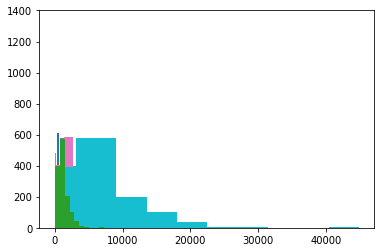

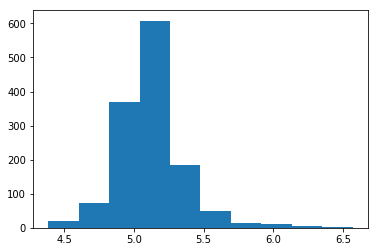

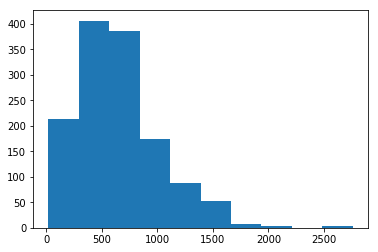

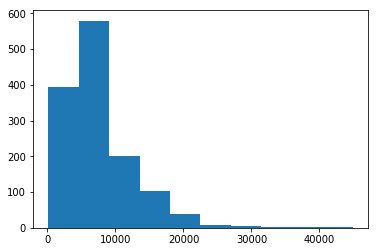

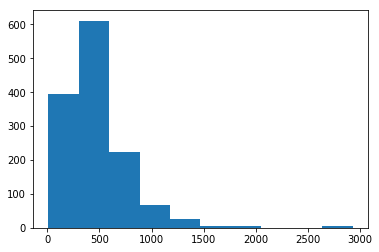

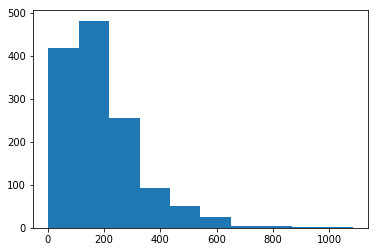

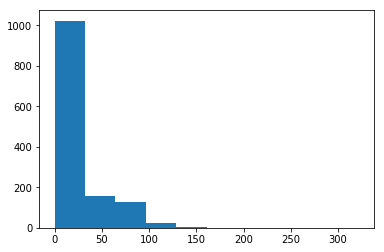

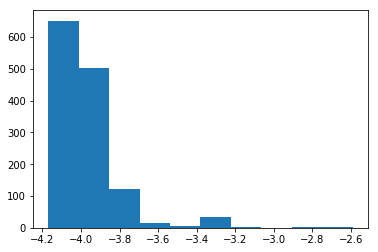

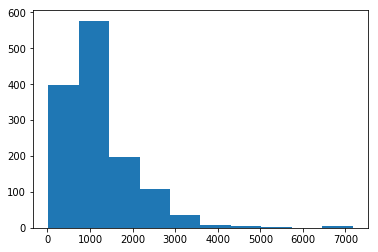

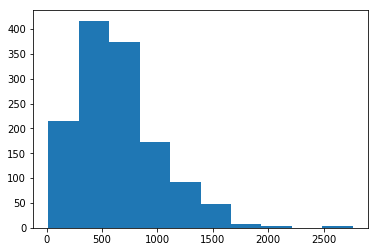

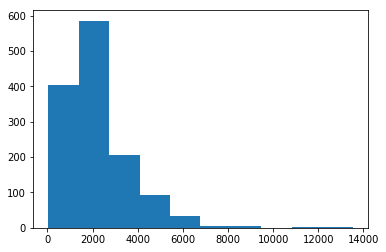

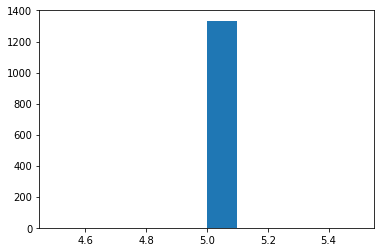

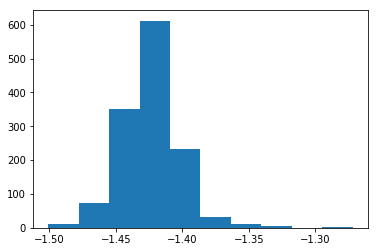

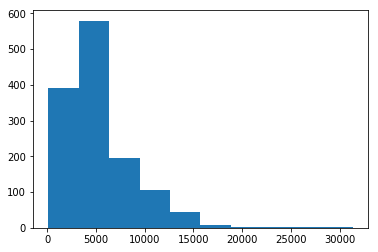

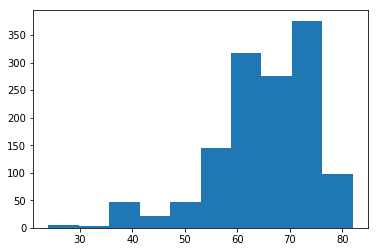

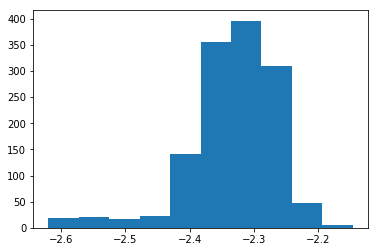

In [89]:
for feat in features.columns :
    plt.hist(features[feat])
    plt.show()

#  Conclusion :  when   feeding in model some features  must   be  transformed   by  log or  box-cox  transformation to make   them more gaussian looking

In [94]:
train.to_csv('/home/thebastard/Downloads/trainNY.csv',index=False)